# Agregación de datos por categorías

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ["Male","Female"]
income = ["Poor","Middle Class","Rich"]

In [4]:
n=500

gender_data=[]
income_data=[]

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [7]:
gender_data[:10]

['Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female']

In [8]:
income_data[:10]

['Poor',
 'Middle Class',
 'Poor',
 'Rich',
 'Poor',
 'Rich',
 'Rich',
 'Rich',
 'Poor',
 'Poor']

In [9]:
#Z -> N(0,1) = normal de media 0 y desviacion 1
#N(m,s) -> m + s * z
height = 160 + 30 * np.random.randn(n) #160cm media, 30 disperción * distribución normal(dataset)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)

In [12]:
data = pd.DataFrame(
{
    "Gender": gender_data,
    "Economic Status": income_data,
    "Height": height,
    "Weight": weight,
    "Age": age,
    "Income": income
})

In [13]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,151.333233,58.571559,25.083853,18811.669049
1,Male,Middle Class,188.791458,60.490436,28.273512,20647.774845
2,Female,Poor,175.360764,79.562310,40.804905,21133.635148
3,Male,Rich,227.726771,89.278713,46.473701,20229.726885
4,Female,Poor,147.750764,87.681465,31.379838,18003.456967


## Agrupación de datos

In [15]:
grouped_gender = data.groupby("Gender") #no divide los datos sino que crea un objeto con 2 atributos: nombre y grupo

In [16]:
grouped_gender.groups

{'Female': Int64Index([  2,   4,   6,   8,   9,  10,  11,  13,  14,  16,
             ...
             483, 484, 485, 486, 487, 488, 490, 493, 495, 496],
            dtype='int64', length=261),
 'Male': Int64Index([  0,   1,   3,   5,   7,  12,  15,  23,  24,  26,
             ...
             475, 480, 482, 489, 491, 492, 494, 497, 498, 499],
            dtype='int64', length=239)}

In [17]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
2    Female            Poor  175.360764   79.562310  40.804905  21133.635148
4    Female            Poor  147.750764   87.681465  31.379838  18003.456967
6    Female            Rich  178.052940  117.889234  40.154730  19647.654315
8    Female            Poor  116.793635   33.899537  33.823378  18147.068678
9    Female            Poor  142.186944   63.415952  39.005010  19623.957781
..      ...             ...         ...         ...        ...           ...
488  Female    Middle Class  187.139102   71.256552  28.074992  18532.319701
490  Female            Rich  176.181864   88.443612  37.178557  20478.686949
493  Female    Middle Class  182.273014   38.237298  47.935574  18250.536635
495  Female    Middle Class  168.069394   82.935965   8.687334  20235.670550
496  Female            Rich  161.804467   72.588560  20.300995  20851.755349

[261 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [18]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
2,Female,Poor,175.360764,79.562310,40.804905,21133.635148
4,Female,Poor,147.750764,87.681465,31.379838,18003.456967
6,Female,Rich,178.052940,117.889234,40.154730,19647.654315
8,Female,Poor,116.793635,33.899537,33.823378,18147.068678
9,Female,Poor,142.186944,63.415952,39.005010,19623.957781
...,...,...,...,...,...,...
488,Female,Middle Class,187.139102,71.256552,28.074992,18532.319701
490,Female,Rich,176.181864,88.443612,37.178557,20478.686949
493,Female,Middle Class,182.273014,38.237298,47.935574,18250.536635
495,Female,Middle Class,168.069394,82.935965,8.687334,20235.670550


In [19]:
#Agrupar por 2 datos
double_group = data.groupby(["Gender", "Economic Status"])

In [20]:
len(double_group)

6

In [21]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
11   Female    Middle Class  153.265288  94.047713  43.969804  19480.281522
13   Female    Middle Class  183.949467  48.586787  29.112225  21250.593945
17   Female    Middle Class  222.878114  89.728774   5.088146  18968.001704
19   Female    Middle Class  163.018923  51.148533  26.122746  18407.242547
20   Female    Middle Class  169.127475  47.555760  15.640873  20501.751767
..      ...             ...         ...        ...        ...           ...
484  Female    Middle Class  159.104680  44.846792  16.260223  18371.767590
485  Female    Middle Class  136.216218  96.052546  51.545889  18751.858879
488  Female    Middle Class  187.139102  71.256552  28.074992  18532.319701
493  Female    Middle Class  182.273014  38.237298  47.935574  18250.536635
495  Female    Middle Class  168.069394  82.935965   8.687334  20235.670550

[93 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

## Operaciones sobre datos agrupados

In [22]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     14499.244764  6024.642692  2704.072268  1.827121e+06
       Poor             12366.315194  5060.643722  2307.851396  1.494246e+06
       Rich             14794.853042  6029.350640  2578.876807  1.822141e+06
Male   Middle Class     15823.006912  6329.769715  2903.296604  1.905427e+06
       Poor             11098.547903  4377.132344  2007.208259  1.344455e+06
       Rich             12044.311098  4810.796388  2453.749118  1.462710e+06

In [23]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     155.905858  64.781104  29.076046  19646.459202
       Poor             162.714674  66.587417  30.366466  19661.126817
       Rich             160.813620  65.536420  28.031270  19805.884479
Male   Middle Class     163.123783  65.255358  29.930893  19643.577722
       Poor             163.213940  64.369593  29.517769  19771.395202
       Rich             162.760961  65.010762  33.158772  19766.357180

In [24]:
double_group.size()

Gender  Economic Status
Female  Middle Class       93
        Poor               76
        Rich               92
Male    Middle Class       97
        Poor               68
        Rich               74
dtype: int64

In [25]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      93.0  155.905858  27.271118   73.551002  137.277026   
       Poor              76.0  162.714674  32.725479   77.894082  146.604326   
       Rich              92.0  160.813620  30.019681   97.232579  138.700739   
Male   Middle Class      97.0  163.123783  26.590101   93.963294  146.114000   
       Poor              68.0  163.213940  29.036642  104.225128  144.248828   
       Rich              74.0  162.760961  31.999788   50.471616  141.826869   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     159.104680  174.168053  222.878114   93.0  64.781104   
       Poor             160.618452  182.091852  249.221652   76.0  66.587417   
       Rich             162.638034  178.245668  250.318188   92.0  65.536420   
Male   Middle Class     160.486557  180.592732  225.596922   97.0  65.255358   
       Poor             165.132366  181.422496  221.748420   68.0  64.369593   
       Rich             165.747446  185.135816  227.726771   74.0  65.010762   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  38.170935  56.295729   93.0  19646.459202   
       Poor             ...  38.244639  55.930016   76.0  19661.126817   
       Rich             ...  34.794046  59.706679   92.0  19805.884479   
Male   Middle Class     ...  36.025389  54.046939   97.0  19643.577722   
       Poor             ...  38.645483  55.214069   68.0  19771.395202   
       Rich             ...  40.125179  72.582890   74.0  19766.357180   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class      981.630805  18090.223388  18786.730849  19629.327229   
       Poor             1048.022545  18003.456967  18717.129644  19624.282744   
       Rich             1046.444286  18076.720052  18805.282445  19917.341388   
Male   Middle Class      966.318561  18017.783003  18840.605138  19500.399335   
       Poor             1017.175054  18032.129139  18932.313911  19677.412564   
       Rich             1092.694776  18005.861606  18690.598361  19882.504905   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20446.698931  21463.634785  
       Poor             20631.100965  21473.430992  
       Rich             20706.826412  21469.242513  
Male   Middle Class     20440.706728  21488.876730  
       Poor             20622.071188  21472.620444  
       Rich             20733.580565  21493.631879  

[6 rows x 32 columns]

In [26]:
grouped_income = double_group["Income"]
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      93.0  19646.459202   981.630805  18090.223388   
       Poor              76.0  19661.126817  1048.022545  18003.456967   
       Rich              92.0  19805.884479  1046.444286  18076.720052   
Male   Middle Class      97.0  19643.577722   966.318561  18017.783003   
       Poor              68.0  19771.395202  1017.175054  18032.129139   
       Rich              74.0  19766.357180  1092.694776  18005.861606   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18786.730849  19629.327229  20446.698931  21463.634785  
       Poor             18717.129644  19624.282744  20631.100965  21473.430992  
       Rich             18805.282445  19917.341388  20706.826412  21469.242513  
Male   Middle Class     18840.605138  19500.399335  20440.706728  21488.876730  
       Poor             18932.313911  19677.412564  20622.071188  21472.620444  
       Rich             18690.598361  19882.504905  20733.580565  21493.631879

In [27]:
double_group.aggregate(
{
    "Income": np.sum,
    "Age": np.mean,
    "Height": np.std
})

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.827121e+06  29.076046  27.271118
       Poor             1.494246e+06  30.366466  32.725479
       Rich             1.822141e+06  28.031270  30.019681
Male   Middle Class     1.905427e+06  29.930893  26.590101
       Poor             1.344455e+06  29.517769  29.036642
       Rich             1.462710e+06  33.158772  31.999788

In [28]:
double_group.aggregate(
{
    "Age": np.mean,
    "Height": lambda h:np.mean(h) / np.std(h)
})

Age    Height
Gender Economic Status                     
Female Middle Class     29.076046  5.747871
       Poor             30.366466  5.005147
       Rich             28.031270  5.386293
Male   Middle Class     29.930893  6.166625
       Poor             29.517769  5.662757
       Rich             33.158772  5.121033

In [30]:
double_group.aggregate([np.sum, np.mean, np.std]) #para aplicarlo a todas las variables

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     14499.244764  155.905858  27.271118  6024.642692   
       Poor             12366.315194  162.714674  32.725479  5060.643722   
       Rich             14794.853042  160.813620  30.019681  6029.350640   
Male   Middle Class     15823.006912  163.123783  26.590101  6329.769715   
       Poor             11098.547903  163.213940  29.036642  4377.132344   
       Rich             12044.311098  162.760961  31.999788  4810.796388   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     64.781104  24.683923  2704.072268  29.076046   
       Poor             66.587417  23.948992  2307.851396  30.366466   
       Rich             65.536420  25.531181  2578.876807  28.031270   
Male   Middle Class     65.255358  28.813569  2903.296604  29.930893   
       Poor             64.369593  24.562056  2007.208259  29.517769   
       Rich             65.010762  22.528031  2453.749118  33.158772   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     13.158054  1.827121e+06  19646.459202   981.630805  
       Poor             11.714701  1.494246e+06  19661.126817  1048.022545  
       Rich             11.618109  1.822141e+06  19805.884479  1046.444286  
Male   Middle Class     11.669326  1.905427e+06  19643.577722   966.318561  
       Poor             11.975173  1.344455e+06  19771.395202  1017.175054  
       Rich             11.521283  1.462710e+06  19766.357180  1092.694776

In [31]:
double_group.aggregate(lambda x:np.mean(x)/np.std(x))

Height    Weight       Age     Income
Gender Economic Status                                         
Female Middle Class     5.747871  2.638650  2.221730  20.122580
       Poor             5.005147  2.798860  2.609391  18.884868
       Rich             5.386293  2.580982  2.425943  19.030550
Male   Middle Class     6.166625  2.276509  2.578245  20.433865
       Poor             5.662757  2.640177  2.483241  19.582073
       Rich             5.121033  2.905470  2.897691  18.213030

## Filtrado de datos

In [32]:
double_group["Age"].filter(lambda x: x.sum()>2400)

1      28.273512
3      46.473701
5      31.257761
6      40.154730
7      43.668410
         ...    
495     8.687334
496    20.300995
497    42.221027
498    40.147196
499    54.046939
Name: Age, Length: 356, dtype: float64

## Transformación de variables

In [36]:
zscore = lambda x: (x-x.mean())/x.std()

In [38]:
z_group = double_group.transform(zscore)

In [40]:
import matplotlib.pyplot as plt

(array([  9.,  15.,  39., 102., 147.,  94.,  60.,  28.,   5.,   1.]),
 array([-2.94833051, -2.31131233, -1.67429416, -1.03727598, -0.4002578 ,
         0.23676037,  0.87377855,  1.51079673,  2.1478149 ,  2.78483308,
         3.42185126]),
 <a list of 10 Patch objects>)

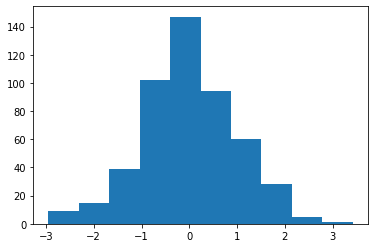

In [41]:
plt.hist(z_group["Age"])

In [44]:
#Reemplazara los datos vacíos por el promedio de datos
fill_na_mean = lambda x: x.fillna(x.mean())

In [45]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,151.333233,58.571559,25.083853,18811.669049
1,188.791458,60.490436,28.273512,20647.774845
2,175.360764,79.562310,40.804905,21133.635148
3,227.726771,89.278713,46.473701,20229.726885
4,147.750764,87.681465,31.379838,18003.456967
...,...,...,...,...
495,168.069394,82.935965,8.687334,20235.670550
496,161.804467,72.588560,20.300995,20851.755349
497,156.910207,-0.889140,42.221027,21371.442286
498,195.873595,33.066217,40.147196,18570.848256


## Operaciones diversas muy útiles

In [46]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,151.333233,58.571559,25.083853,18811.669049
1,Male,Middle Class,188.791458,60.490436,28.273512,20647.774845
2,Female,Poor,175.360764,79.562310,40.804905,21133.635148
3,Male,Rich,227.726771,89.278713,46.473701,20229.726885
6,Female,Rich,178.052940,117.889234,40.154730,19647.654315
11,Female,Middle Class,153.265288,94.047713,43.969804,19480.281522


In [47]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
482,Male,Poor,134.662426,63.485017,32.574842,19406.999936
486,Female,Poor,157.963048,67.412853,17.124237,19694.561136
495,Female,Middle Class,168.069394,82.935965,8.687334,20235.670550
496,Female,Rich,161.804467,72.588560,20.300995,20851.755349
498,Male,Rich,195.873595,33.066217,40.147196,18570.848256
499,Male,Middle Class,131.217733,32.137262,54.046939,20202.740732


In [48]:
double_group.nth(32) #elemento 32 de cada una de las filas

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     153.757023  53.443824  53.223106  19727.921759
       Poor             163.990261  58.584916  31.267554  21245.856447
       Rich             117.203801  65.543011  30.862005  18765.781475
Male   Middle Class     145.116729  32.078866  21.220611  18883.561934
       Poor             152.991244  40.923727  40.078636  19660.856464
       Rich             200.476655  62.588139  32.661642  19508.871127

In [49]:
double_group.nth(82)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     150.536912  114.534532  24.271079  18326.598239
       Rich             178.823850   42.056236  22.868651  19344.697117
Male   Middle Class     155.296055  -27.465862  52.486280  19784.156664

In [50]:
data_sorted = data.sort_values(["Age","Income"]) #ordenar por edad e ingresos

In [51]:
data_sorted

,Gender,Economic Status,Height,Weight,Age,Income
273,Female,Middle Class,130.843286,67.195678,-8.600027,19907.447997
421,Female,Middle Class,132.440187,58.055935,-6.484287,18400.667101
64,Male,Poor,157.969972,45.842721,-4.723559,19579.209251
25,Female,Poor,185.136347,90.700041,-1.687003,19167.492005
29,Male,Middle Class,170.629150,77.149379,-1.434848,18807.876478
...,...,...,...,...,...,...
429,Female,Middle Class,119.871563,69.107706,56.295729,18839.325891
66,Female,Rich,144.027530,91.334240,57.427633,18306.815762
418,Female,Rich,171.331049,68.248424,59.706679,21179.574537
142,Male,Rich,178.812214,57.415568,64.811092,20851.926221


In [52]:
age_grouped = data_sorted.groupby("Gender")

In [54]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
273,Female,Middle Class,130.843286,67.195678,-8.600027,19907.447997
64,Male,Poor,157.969972,45.842721,-4.723559,19579.209251


In [55]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
418,Female,Rich,171.331049,68.248424,59.706679,21179.574537
329,Male,Rich,148.286689,63.209475,72.582890,19154.933995


# Conjunto de entrenamiento y conjunto de testing

In [56]:
import pandas as pd

In [58]:
data = pd.read_csv("../data/datasets/customer-churn-model/Customer Churn Model.txt")

In [59]:
len(data)

3333

### Dividir utilizando la distribución normal

In [60]:
a = np.random.randn(len(data))

(array([  3.,  18.,  98., 441., 838., 922., 681., 267.,  59.,   6.]),
 array([-4.06714193, -3.30097192, -2.5348019 , -1.76863189, -1.00246188,
        -0.23629187,  0.52987815,  1.29604816,  2.06221817,  2.82838818,
         3.5945582 ]),
 <a list of 10 Patch objects>)

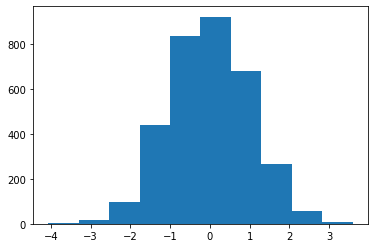

In [61]:
plt.hist(a)

In [74]:
check = (a<0.75)

In [75]:
check

array([ True,  True,  True, ...,  True, False,  True])

(array([ 776.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2557.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

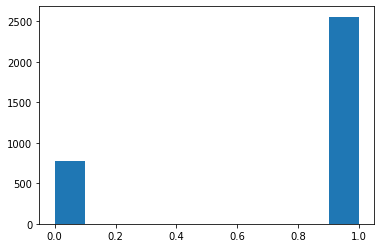

In [76]:
values = pd.get_dummies(check, prefix = "check") #toma la variable check y la traduce a valores
plt.hist(values["check_True"]) #cantidad de valores que cumplen con la condicion check (a<0.75)

In [77]:
training = data[check]
testing = data[~check]

In [78]:
len(training)

2557

In [79]:
len(testing)

776

### Con la librería sklearn

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
train, test = train_test_split(data, test_size = 0.2)

In [82]:
len(train)

2666

In [83]:
len(test)

667

### Usando una función de shuffle

In [84]:
import sklearn

In [86]:
data = sklearn.utils.shuffle(data)

In [87]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [88]:
len(train_data)

2499

In [89]:
len(test_data)

833